# Generation of data for toy problem: 2D Gaussian cloud with varying center and variance

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normalized_gaussian_2d(x, y, x0=0, y0=0, sigma_x=1, sigma_y=1):
    coefficient = 1 / (2 * np.pi * sigma_x * sigma_y)
    exponent = -(((x - x0) ** 2) / (2 * sigma_x ** 2) + ((y - y0) ** 2) / (2 * sigma_y ** 2))
    return coefficient * np.exp(exponent)/np.amax(coefficient * np.exp(exponent))

In [4]:
a = np.linspace(-1.5,1.5,128)
b = np.linspace(1.5,-1.5,128)
X, Y = np.meshgrid(a, b)

In [5]:
training_field = []
training_field_parameters = []

for i in range(10000):
    x = np.random.rand() * 1.5 - 0.5
    y = np.random.rand() * 1.5 - 0.5
    sigma = np.random.rand() * 0.25+0.001
    field = normalized_gaussian_2d(X,Y,x,y,sigma,sigma)
    training_field.append([[field]])
    training_field_parameters.append([x,y,sigma])
    
print('training_field', np.shape(training_field))
print('training_field_parameters', np.shape(training_field_parameters))

np.save('../../../../../scratch/aalelonghi/gaussian_shapes/training_field', np.float32(training_field), allow_pickle=True, fix_imports=True)
np.save('../../../../../scratch/aalelonghi/gaussian_shapes/training_field_parameters', np.float32(training_field_parameters), allow_pickle=True, fix_imports=True)

training_field (10000, 1, 1, 128, 128)
training_field_parameters (10000, 3)


In [9]:
validation_field = []
validation_field_parameters = []

for i in range(500):
    x = np.random.rand() * 1.5 - 0.5
    y = np.random.rand() * 1.5 - 0.5
    sigma = np.random.rand() * 0.25+0.001
    field = normalized_gaussian_2d(X,Y,x,y,sigma,sigma)
    validation_field.append([[field]])
    validation_field_parameters.append([x,y,sigma])
    
print('validation_field', np.shape(validation_field))
print('validation_field_parameters', np.shape(validation_field_parameters))

np.save('../../../../../scratch/aalelonghi/gaussian_shapes/validation_field', np.float32(validation_field), allow_pickle=True, fix_imports=True)
np.save('../../../../../scratch/aalelonghi/gaussian_shapes/validation_field_parameters', np.float32(validation_field_parameters), allow_pickle=True, fix_imports=True)

validation_field (500, 1, 1, 128, 128)
validation_field_parameters (500, 3)


In [7]:
test_field = []
test_field_parameters = []

for i in range(1000):
    x = np.random.rand() * 1.5 - 0.5
    y = np.random.rand() * 1.5 - 0.5
    sigma = np.random.rand() * 0.25+0.001
    field = normalized_gaussian_2d(X,Y,x,y,sigma,sigma)
    test_field.append([[field]])
    test_field_parameters.append([x,y,sigma])
    
print('test_field', np.shape(test_field))
print('test_field_parameters', np.shape(test_field_parameters))

np.save('../../../../../scratch/aalelonghi/gaussian_shapes/test_field', np.float32(test_field), allow_pickle=True, fix_imports=True)
np.save('../../../../../scratch/aalelonghi/gaussian_shapes/test_field_parameters', np.float32(test_field_parameters), allow_pickle=True, fix_imports=True)

test_field (1000, 1, 1, 128, 128)
test_field_parameters (1000, 3)


[0.38974382739746316, 0.7711137320205625, 0.030179935860217666]


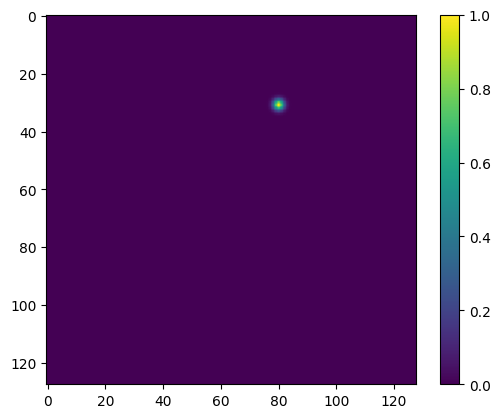

In [7]:
sample = 24
plt.imshow(training_field[sample][0][0])
plt.colorbar()
print(training_field_parameters[sample])

In [20]:
# vary only x
test_field = []
test_field_parameters = []
for i in np.arange(-0.5,0.5,0.01):
    x = i
    y = 0.0
    sigma = 0.1
    field = normalized_gaussian_2d(X,Y,x,y,sigma,sigma)
    test_field.append([[field]])
    test_field_parameters.append([x,y,sigma])
    
print('test_field', np.shape(test_field))
print('test_field_parameters', np.shape(test_field_parameters))

np.save('../../../../../scratch/aalelonghi/gaussian_shapes/test_field_x', np.float32(test_field), allow_pickle=True, fix_imports=True)
np.save('../../../../../scratch/aalelonghi/gaussian_shapes/test_field_parameters_x', np.float32(test_field_parameters), allow_pickle=True, fix_imports=True)

test_field (100, 1, 1, 128, 128)
test_field_parameters (100, 3)


In [21]:
# vary only y
test_field = []
test_field_parameters = []
for i in np.arange(-0.5,0.5,0.01):
    y = i
    x = 0.0
    sigma = 0.1
    field = normalized_gaussian_2d(X,Y,x,y,sigma,sigma)
    test_field.append([[field]])
    test_field_parameters.append([x,y,sigma])
    
print('test_field', np.shape(test_field))
print('test_field_parameters', np.shape(test_field_parameters))

np.save('../../../../../scratch/aalelonghi/gaussian_shapes/test_field_y', np.float32(test_field), allow_pickle=True, fix_imports=True)
np.save('../../../../../scratch/aalelonghi/gaussian_shapes/test_field_parameters_y', np.float32(test_field_parameters), allow_pickle=True, fix_imports=True)

test_field (100, 1, 1, 128, 128)
test_field_parameters (100, 3)


In [5]:
# vary only sigma
test_field = []
test_field_parameters = []
for sigma in np.linspace(-0.001,0.251,100):
    y = 0.0
    x = 0.0
    field = normalized_gaussian_2d(X,Y,x,y,sigma,sigma)
    test_field.append([[field]])
    test_field_parameters.append([x,y,sigma])
    
print('test_field', np.shape(test_field))
print('test_field_parameters', np.shape(test_field_parameters))

np.save('../../../../../scratch/aalelonghi/gaussian_shapes/test_field_sigma', np.float32(test_field), allow_pickle=True, fix_imports=True)
np.save('../../../../../scratch/aalelonghi/gaussian_shapes/test_field_parameters_sigma', np.float32(test_field_parameters), allow_pickle=True, fix_imports=True)

test_field (100, 1, 1, 128, 128)
test_field_parameters (100, 3)


In [4]:
# bigger sigma than training
test_field = []
test_field_parameters = []
for sigma in np.linspace(0.251,0.3,100):
    y = 0.0
    x = 0.0
    field = normalized_gaussian_2d(X,Y,x,y,sigma,sigma)
    test_field.append([[field]])
    test_field_parameters.append([x,y,sigma])
    
print('test_field', np.shape(test_field))
print('test_field_parameters', np.shape(test_field_parameters))

np.save('../../../../../scratch/aalelonghi/gaussian_shapes/test_field_bigger_sigma', np.float32(test_field), allow_pickle=True, fix_imports=True)
np.save('../../../../../scratch/aalelonghi/gaussian_shapes/test_field_parameters_bigger_sigma', np.float32(test_field_parameters), allow_pickle=True, fix_imports=True)

test_field (100, 1, 1, 128, 128)
test_field_parameters (100, 3)
